Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


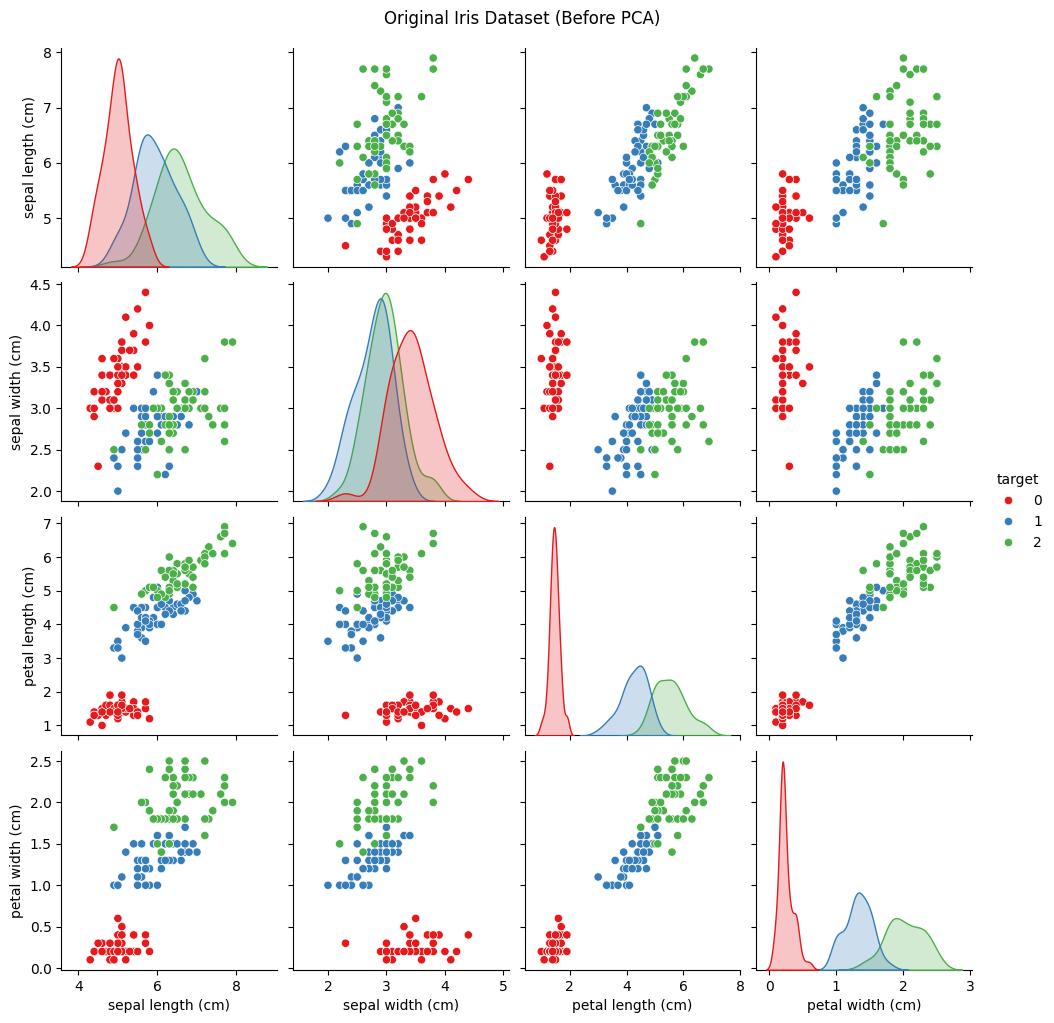


Explained Variance Ratio of each PC:
[0.72962445 0.22850762]
Total Variance Explained by PC1 + PC2: 0.9581320720000166


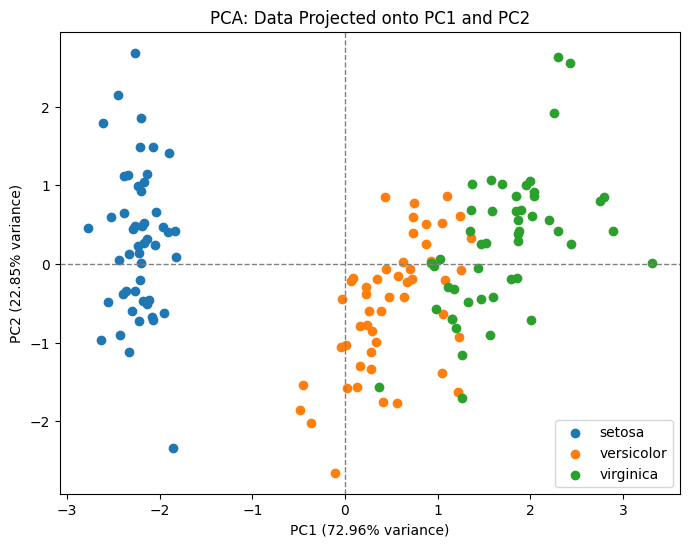

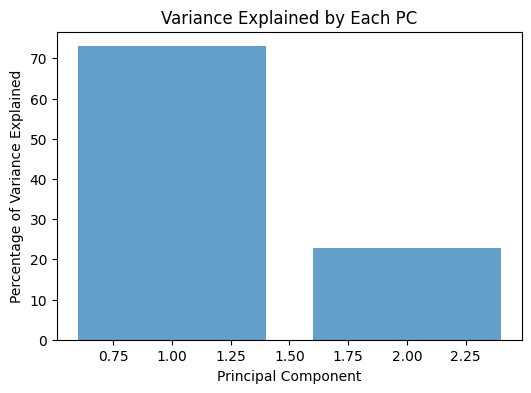

In [4]:


# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset Preview:")
print(df.head())

# Step 3: Pairplot of original 4D features (before PCA)
sns.pairplot(df, vars=feature_names, hue="target", palette="Set1")
plt.suptitle("Original Iris Dataset (Before PCA)", y=1.02)
plt.show()

# Step 4: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio of each PC:")
print(pca.explained_variance_ratio_)
print("Total Variance Explained by PC1 + PC2:",
      np.sum(pca.explained_variance_ratio_))

# Step 6: Create PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Step 7: Visualize PCA Results with PC1 and PC2 clearly shown
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(pca_df.loc[pca_df['target']==i, 'PC1'],
                pca_df.loc[pca_df['target']==i, 'PC2'],
                label=target_name)

# Label axes with variance explained
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.title("PCA: Data Projected onto PC1 and PC2")
plt.legend()
plt.show()

# Step 8: Variance explained bar chart
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_*100, alpha=0.7)
plt.ylabel("Percentage of Variance Explained")
plt.xlabel("Principal Component")
plt.title("Variance Explained by Each PC")
plt.show()
